In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
raw_data = pd.read_csv("data/steam_games.csv", sep=";")

raw_data.head()

C:\Users\sjkie\AppData\Local\Temp\ipykernel_15720\2383821601.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv("data/steam_games.csv", sep=";")


,App ID,Name,Short Description,Developer,Publisher,Genre,Tags,Type,Categories,Owners,...,Price,Initial Price,Discount,CCU,Languages,Platforms,Release Date,Required Age,Website,Header Image
0,10,Counter-Strike,Play the world's number 1 online action game. ...,Valve,Valve,Action,"Action: 5426, FPS: 4831, Multiplayer: 3392, Sh...",game,"Multi-player, Valve Anti-Cheat enabled, Online...","10,000,000 .. 20,000,000",...,999,999,0,13990,"English, French, German, Italian, Spanish - Sp...","windows, mac, linux",2000/11/1,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
1,1000000,ASCENXION,ASCENXION is a 2D shoot 'em up game where you ...,IndigoBlue Game Studio,PsychoFlux Entertainment,"Action, Adventure, Indie","""Shoot Em Up"": 186, Metroidvania: 181, Bullet ...",game,"Single-player, Partial Controller Support, Ste...","0 .. 20,000",...,999,999,0,0,"English, Korean, Simplified Chinese",windows,2021/05/14,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
2,1000010,Crown Trick,"Enter a labyrinth that moves as you move, wher...",NEXT Studios,"Team17, NEXT Studios","Adventure, Indie, RPG, Strategy","Rogue-like: 268, Turn-Based Combat: 254, RPG: ...",game,"Single-player, Partial Controller Support, Ste...","200,000 .. 500,000",...,599,1999,70,99,"Simplified Chinese, English, Japanese, Traditi...",windows,2020/10/16,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
3,1000030,"Cook, Serve, Delicious! 3?!","Cook, serve and manage your food truck as you ...",Vertigo Gaming Inc.,Vertigo Gaming Inc.,"Action, Indie, Simulation, Strategy","Typing: 221, Management: 213, Casual: 209, Dif...",game,"Multi-player, Single-player, Co-op, Steam Achi...","100,000 .. 200,000",...,1999,1999,0,76,English,"windows, mac",2020/10/14,0,http://www.cookservedelicious.com,https://cdn.akamai.steamstatic.com/steam/apps/...
4,1000040,细胞战争,这是一款打击感十足的细胞主题游戏！操作简单但活下去却不简单，“你”作为侵入人体的细菌病毒，通...,DoubleC Games,DoubleC Games,"Action, Casual, Indie, Simulation","Action: 22, Casual: 22, Indie: 21, Simulation: 20",game,Single-player,"0 .. 20,000",...,199,199,0,0,Simplified Chinese,windows,2019/03/30,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...


In [5]:
# basic EDA summary
print(f"Total rows: {raw_data.shape[0]}")
print(f"Total columns: {raw_data.shape[1]}")
print(f"Null values: {raw_data.isna().sum().sum()}")

Total rows: 55691
Total columns: 22
Null values: 26910


In [6]:
raw_data.isna().sum()

App ID                   0
Name                     0
Short Description       37
Developer              129
Publisher              151
Genre                  161
Tags                   135
Type                     0
Categories             970
Owners                   0
Positive Reviews         0
Negative Reviews         0
Price                    0
Initial Price            0
Discount                 0
CCU                      0
Languages               11
Platforms                0
Release Date            99
Required Age             0
Website              25217
Header Image             0
dtype: int64

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55691 entries, 0 to 55690
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   App ID             55691 non-null  int64 
 1   Name               55691 non-null  object
 2   Short Description  55654 non-null  object
 3   Developer          55562 non-null  object
 4   Publisher          55540 non-null  object
 5   Genre              55530 non-null  object
 6   Tags               55556 non-null  object
 7   Type               55691 non-null  object
 8   Categories         54721 non-null  object
 9   Owners             55691 non-null  object
 10  Positive Reviews   55691 non-null  int64 
 11  Negative Reviews   55691 non-null  int64 
 12  Price              55691 non-null  int64 
 13  Initial Price      55691 non-null  int64 
 14  Discount           55691 non-null  int64 
 15  CCU                55691 non-null  int64 
 16  Languages          55680 non-null  objec

In [8]:
raw_data.shape

(55691, 22)

In [9]:
numeric_df = raw_data.select_dtypes("number").copy()
numeric_df.head()

,App ID,Positive Reviews,Negative Reviews,Price,Initial Price,Discount,CCU
0,10,201215,5199,999,999,0,13990
1,1000000,27,5,999,999,0,0
2,1000010,4032,646,599,1999,70,99
3,1000030,1575,115,1999,1999,0,76
4,1000040,0,1,199,199,0,0


In [10]:
categorical_df = raw_data.select_dtypes("object").copy()
categorical_df.head()

,Name,Short Description,Developer,Publisher,Genre,Tags,Type,Categories,Owners,Languages,Platforms,Release Date,Required Age,Website,Header Image
0,Counter-Strike,Play the world's number 1 online action game. ...,Valve,Valve,Action,"Action: 5426, FPS: 4831, Multiplayer: 3392, Sh...",game,"Multi-player, Valve Anti-Cheat enabled, Online...","10,000,000 .. 20,000,000","English, French, German, Italian, Spanish - Sp...","windows, mac, linux",2000/11/1,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
1,ASCENXION,ASCENXION is a 2D shoot 'em up game where you ...,IndigoBlue Game Studio,PsychoFlux Entertainment,"Action, Adventure, Indie","""Shoot Em Up"": 186, Metroidvania: 181, Bullet ...",game,"Single-player, Partial Controller Support, Ste...","0 .. 20,000","English, Korean, Simplified Chinese",windows,2021/05/14,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
2,Crown Trick,"Enter a labyrinth that moves as you move, wher...",NEXT Studios,"Team17, NEXT Studios","Adventure, Indie, RPG, Strategy","Rogue-like: 268, Turn-Based Combat: 254, RPG: ...",game,"Single-player, Partial Controller Support, Ste...","200,000 .. 500,000","Simplified Chinese, English, Japanese, Traditi...",windows,2020/10/16,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
3,"Cook, Serve, Delicious! 3?!","Cook, serve and manage your food truck as you ...",Vertigo Gaming Inc.,Vertigo Gaming Inc.,"Action, Indie, Simulation, Strategy","Typing: 221, Management: 213, Casual: 209, Dif...",game,"Multi-player, Single-player, Co-op, Steam Achi...","100,000 .. 200,000",English,"windows, mac",2020/10/14,0,http://www.cookservedelicious.com,https://cdn.akamai.steamstatic.com/steam/apps/...
4,细胞战争,这是一款打击感十足的细胞主题游戏！操作简单但活下去却不简单，“你”作为侵入人体的细菌病毒，通...,DoubleC Games,DoubleC Games,"Action, Casual, Indie, Simulation","Action: 22, Casual: 22, Indie: 21, Simulation: 20",game,Single-player,"0 .. 20,000",Simplified Chinese,windows,2019/03/30,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...


In [22]:
Genre = pd.DataFrame(raw_data, columns=['Genre'],dtype='str')
Genre.head()

,Genre
0,Action
1,"Action, Adventure, Indie"
2,"Adventure, Indie, RPG, Strategy"
3,"Action, Indie, Simulation, Strategy"
4,"Action, Casual, Indie, Simulation"


In [23]:

genres = raw_data['Genre'].astype(str).str.split(',').apply(lambda x: [i.strip() for i in x]).str.join('|').str.get_dummies()
genres = genres.drop(['nan'], axis=1)
genres.head()

,Accounting,Action,Adventure,Animation & Modeling,Audio Production,Casual,Design & Illustration,Early Access,Education,Free to Play,...,Racing,Sexual Content,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Violent,Web Publishing
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


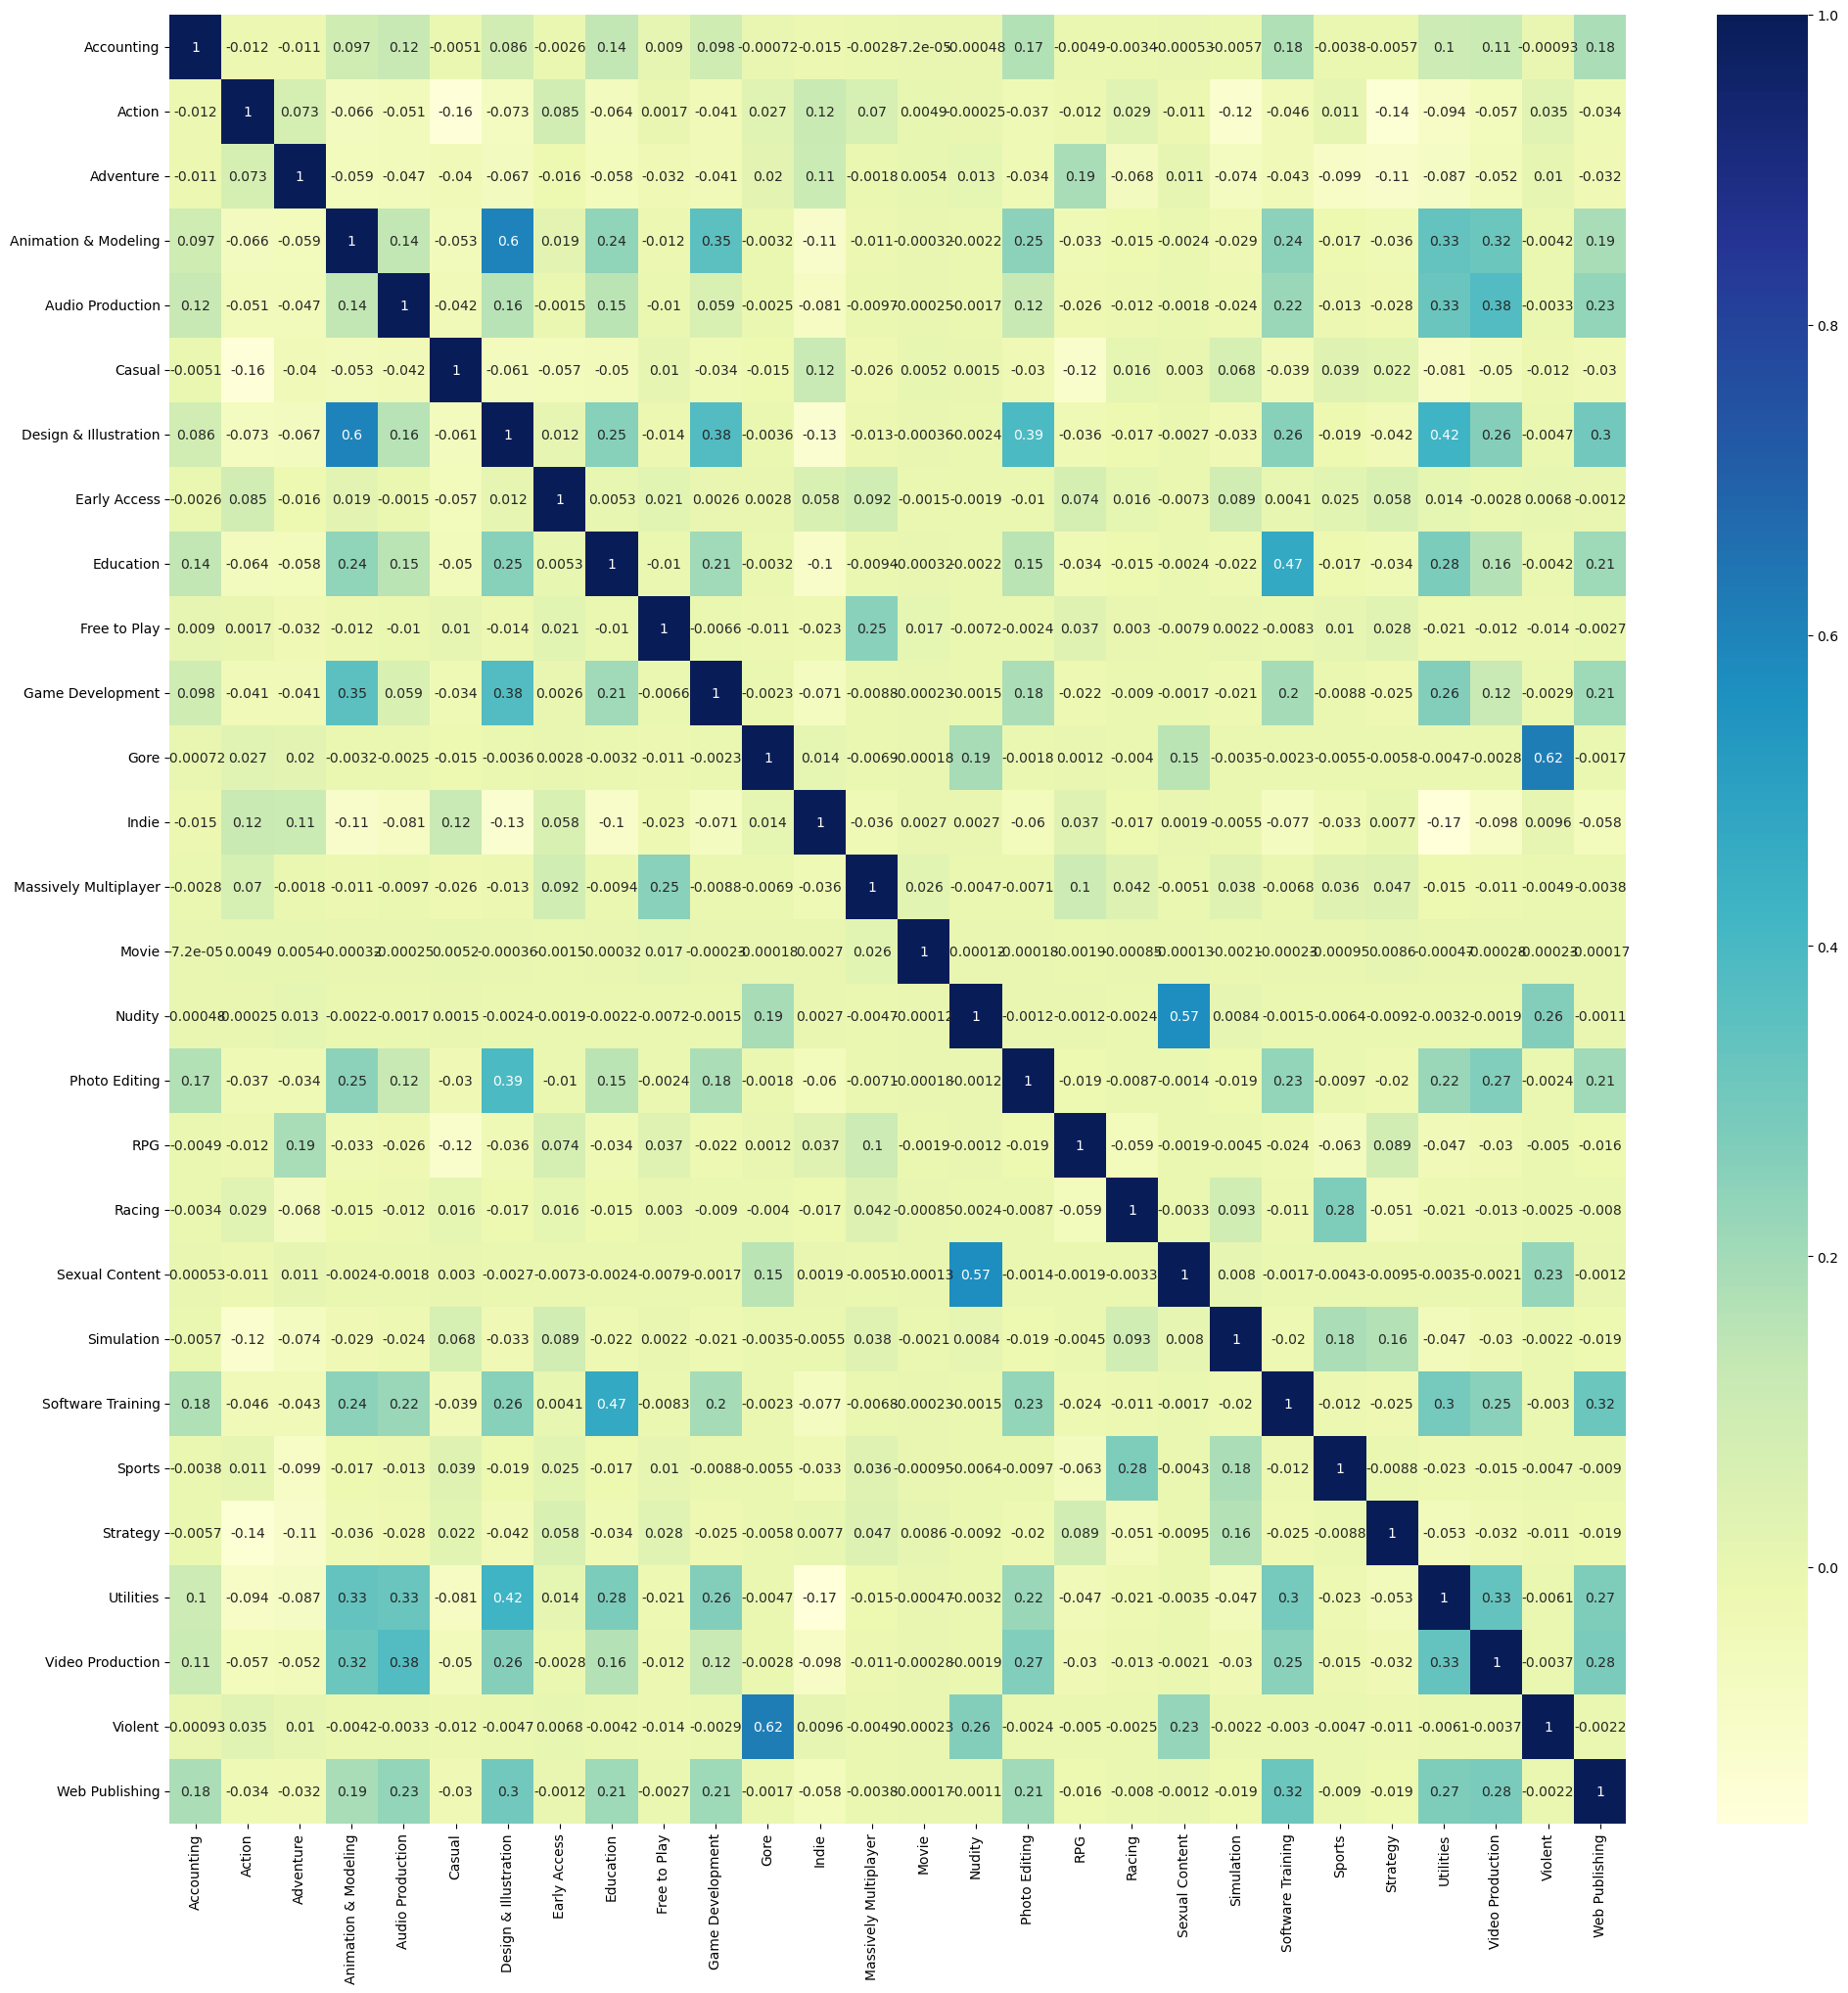

In [5]:
plt.figure(figsize=(24,24))

# plotting correlation heatmap
sns_plot = sns.heatmap(genres.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap



results_path = 'results2.pdf'
#print(results_path)
plt.savefig(results_path)
plt.show()

In [6]:
genres = genres.drop(columns=['Audio Production', 'Animation & Modeling', 'Design & Illustration', 'Nudity',
                                      'Game Development', 'Photo Editing', 'Sexual Content', 'Software Training',
                                      'Utilities', 'Video Production','Web Publishing', 'Accounting'])
genres.head()

,Action,Adventure,Casual,Early Access,Education,Free to Play,Gore,Indie,Massively Multiplayer,Movie,RPG,Racing,Simulation,Sports,Strategy,Violent
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
3,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
4,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0


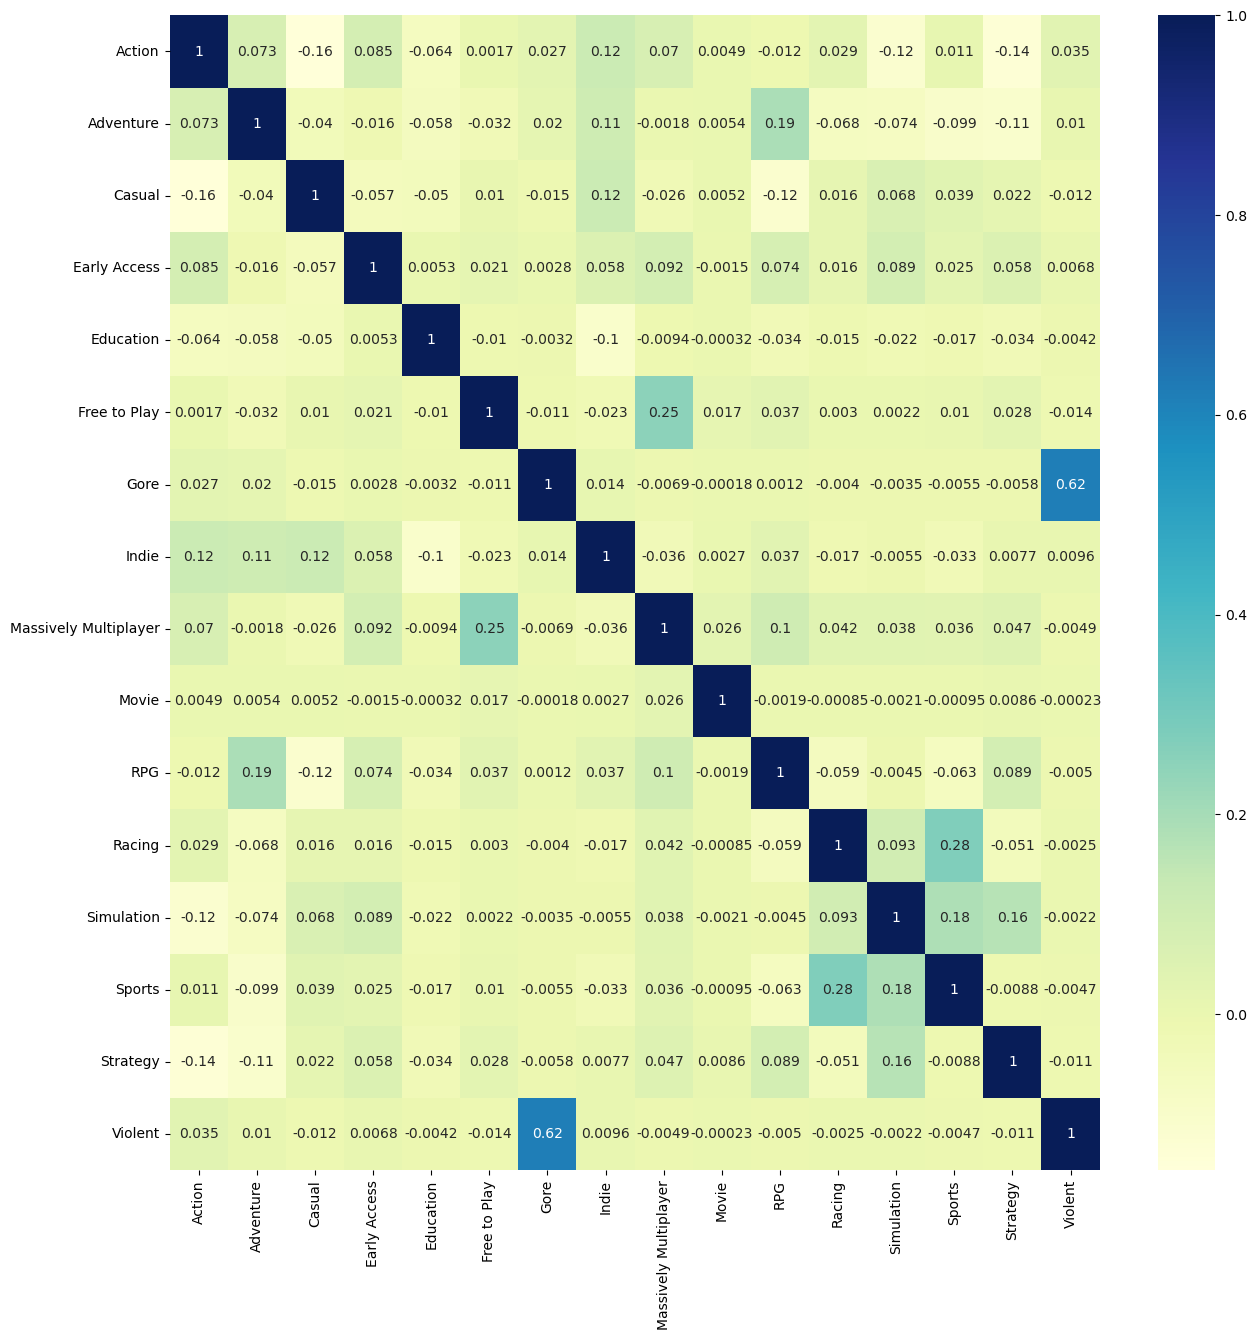

In [7]:
plt.figure(figsize=(15,15))

# plotting correlation heatmap
sns_plot = sns.heatmap(genres.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap



results_path = 'results3.pdf'
#print(results_path)
plt.savefig(results_path)
plt.show()

In [8]:
raw_data.head()

,App ID,Name,Short Description,Developer,Publisher,Genre,Tags,Type,Categories,Owners,...,Price,Initial Price,Discount,CCU,Languages,Platforms,Release Date,Required Age,Website,Header Image
0,10,Counter-Strike,Play the world's number 1 online action game. ...,Valve,Valve,Action,"Action: 5426, FPS: 4831, Multiplayer: 3392, Sh...",game,"Multi-player, Valve Anti-Cheat enabled, Online...","10,000,000 .. 20,000,000",...,999,999,0,13990,"English, French, German, Italian, Spanish - Sp...","windows, mac, linux",2000/11/1,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
1,1000000,ASCENXION,ASCENXION is a 2D shoot 'em up game where you ...,IndigoBlue Game Studio,PsychoFlux Entertainment,"Action, Adventure, Indie","""Shoot Em Up"": 186, Metroidvania: 181, Bullet ...",game,"Single-player, Partial Controller Support, Ste...","0 .. 20,000",...,999,999,0,0,"English, Korean, Simplified Chinese",windows,2021/05/14,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
2,1000010,Crown Trick,"Enter a labyrinth that moves as you move, wher...",NEXT Studios,"Team17, NEXT Studios","Adventure, Indie, RPG, Strategy","Rogue-like: 268, Turn-Based Combat: 254, RPG: ...",game,"Single-player, Partial Controller Support, Ste...","200,000 .. 500,000",...,599,1999,70,99,"Simplified Chinese, English, Japanese, Traditi...",windows,2020/10/16,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
3,1000030,"Cook, Serve, Delicious! 3?!","Cook, serve and manage your food truck as you ...",Vertigo Gaming Inc.,Vertigo Gaming Inc.,"Action, Indie, Simulation, Strategy","Typing: 221, Management: 213, Casual: 209, Dif...",game,"Multi-player, Single-player, Co-op, Steam Achi...","100,000 .. 200,000",...,1999,1999,0,76,English,"windows, mac",2020/10/14,0,http://www.cookservedelicious.com,https://cdn.akamai.steamstatic.com/steam/apps/...
4,1000040,细胞战争,这是一款打击感十足的细胞主题游戏！操作简单但活下去却不简单，“你”作为侵入人体的细菌病毒，通...,DoubleC Games,DoubleC Games,"Action, Casual, Indie, Simulation","Action: 22, Casual: 22, Indie: 21, Simulation: 20",game,Single-player,"0 .. 20,000",...,199,199,0,0,Simplified Chinese,windows,2019/03/30,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
